## FORMULA 1 DATA ANALAYSIS

Formula 1 is the most advanced form of motorsports, Known for its intensive use of science and technolgy. It has a name "PINNACLE OF MOTORSPORT" 
About the sport:
Teams in the recent hybrid era have been 10, known as constructors also.
Every team has two drivers and two cars.
so 20 drivers
there will be around 20-22 races per year.
each race will be held in differrent tracks all around the world.
The race weekend will start from 
friday which has 2 practices 
saturday one practice session winded up with a qualifier session
sprint races are another form of races which will be held at some special tracks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:

results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers =  pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')

In [3]:
df = pd.merge(results, races[['raceId','year','name','round']],on = 'raceId', how='left')
df = pd.merge(df, drivers[['driverId','driverRef', 'nationality']], on='driverId', how='left')
df = pd.merge(df, constructors[['constructorId','name','nationality']],on = 'constructorId', how='left')

In [4]:
df.drop(['number','position','laps','fastestLap','statusId','resultId','driverId','constructorId'], axis=1, inplace=True)

In [5]:
df.rename(columns={'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality','name_y':'constructor_name','nationality_y' :'constructor_nationality', 'driverRef':'driver'}, inplace=True)


In [6]:
df = df[['year','gp_name', 'round','driver', 'constructor_name','grid','positionOrder','points','time','milliseconds','fastest_lap_rank','fastestLapTime','fastestLapSpeed','driver_nationality','constructor_nationality']]

In [7]:
df = df[df['year']!= 2022]

In [8]:
df = df.sort_values(by=['year','round','positionOrder'], ascending= [False, True, True])

In [9]:
df.time.replace('\\N', np.nan,inplace=True)
df.milliseconds.replace('\\N', np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan,inplace=True)
df.fastestLapTime.replace('\\N', np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N', np.nan,inplace=True)



In [10]:
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)


In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
print(df.shape)

(25400, 15)


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25400 non-null  int64  
 1   gp_name                  25400 non-null  object 
 2   round                    25400 non-null  int64  
 3   driver                   25400 non-null  object 
 4   constructor_name         25400 non-null  object 
 5   grid                     25400 non-null  int64  
 6   positionOrder            25400 non-null  int64  
 7   points                   25400 non-null  float64
 8   time                     6809 non-null   object 
 9   milliseconds             6808 non-null   float64
 10  fastest_lap_rank         7151 non-null   float64
 11  fastestLapTime           6953 non-null   object 
 12  fastestLapSpeed          6953 non-null   float64
 13  driver_nationality       25400 non-null  object 
 14  constructor_nationalit

In [14]:
df.head(10)

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
5,2021,Bahrain Grand Prix,1,leclerc,Ferrari,4,6,8.0,+59.090,5582987.0,11.0,1:34.988,205.112,Monegasque,Italian
6,2021,Bahrain Grand Prix,1,ricciardo,McLaren,6,7,6.0,+66.004,5589901.0,10.0,1:34.932,205.233,Australian,British
7,2021,Bahrain Grand Prix,1,sainz,Ferrari,8,8,4.0,+67.100,5590997.0,7.0,1:34.509,206.151,Spanish,Italian
8,2021,Bahrain Grand Prix,1,tsunoda,AlphaTauri,13,9,2.0,+85.692,5609589.0,8.0,1:34.761,205.603,Japanese,Italian
9,2021,Bahrain Grand Prix,1,stroll,Aston Martin,10,10,1.0,+86.713,5610610.0,9.0,1:34.865,205.378,Canadian,British


In [15]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize'] = (15, 8)

In [16]:
#all gp winners
gp_winners1950 = df.loc[df['positionOrder'] == 1].groupby('driver')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()

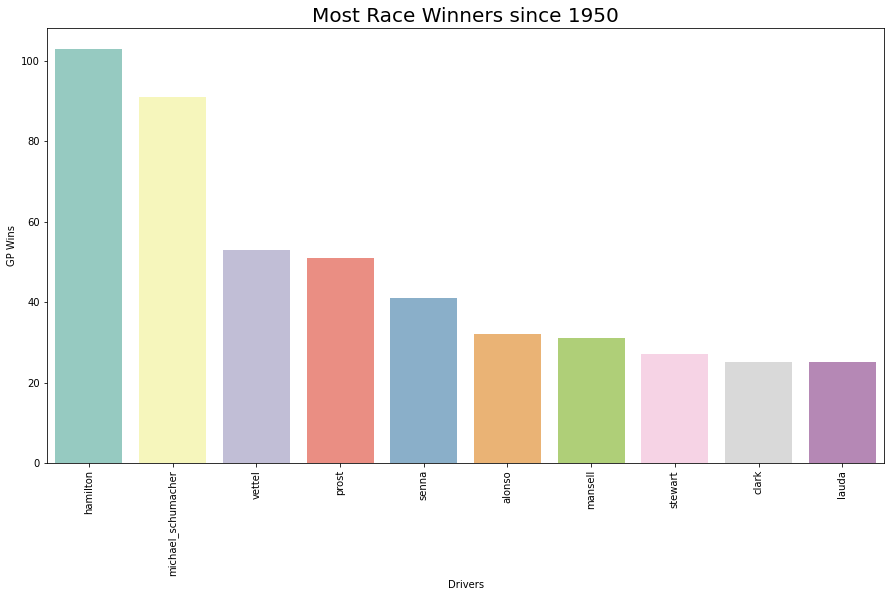

In [17]:
#barplot
plt.figure(figsize=(15,8))
sns.barplot(x = 'driver', y = 'positionOrder', data = gp_winners1950.head(10))
#sns.barplot(data = gp_winners1950, x = 'driver', y = 'positionOrder')
plt.title('Most Race Winners since 1950', fontsize = 20,)
plt.xlabel('Drivers' )
plt.ylabel('GP Wins')
plt.xticks(rotation = 90)
plt.show()

Formula 1 started from 1950 and collectively these are the top10 drivers. To be noted that Sir Lewis Hamilton from mercedes is still racing his record is yet to be broken by himself. He is considered as the most successfull driver in the history

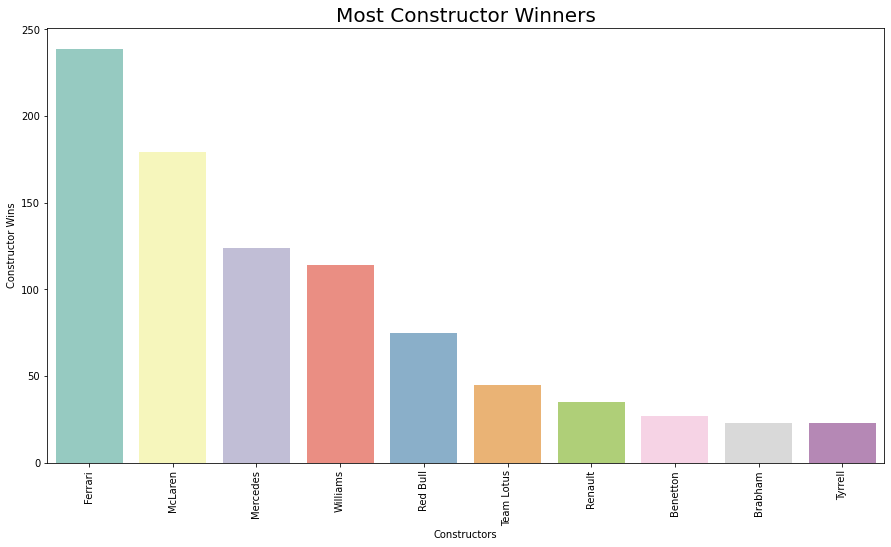

In [18]:
constructor_winners = df.loc[df['positionOrder'] == 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
sns.barplot(x = 'constructor_name', y = 'positionOrder', data = constructor_winners.head(10))
plt.title('Most Constructor Winners', fontsize = 20)
plt.xlabel('Constructors')
plt.ylabel('Constructor Wins')
plt.xticks(rotation = 90)
plt.show()

Ferrari are the world famous known super cars and hyper cars , hey have been in the sport from the starting and they have quite a lot of dominationa dn similary Mclaren. They have had very succesfullc ars and drivvrs and have won and made an extensive records already.

## 2021 SEASON ANALYSIS  ##

Now concentrating more on the 2021 season 

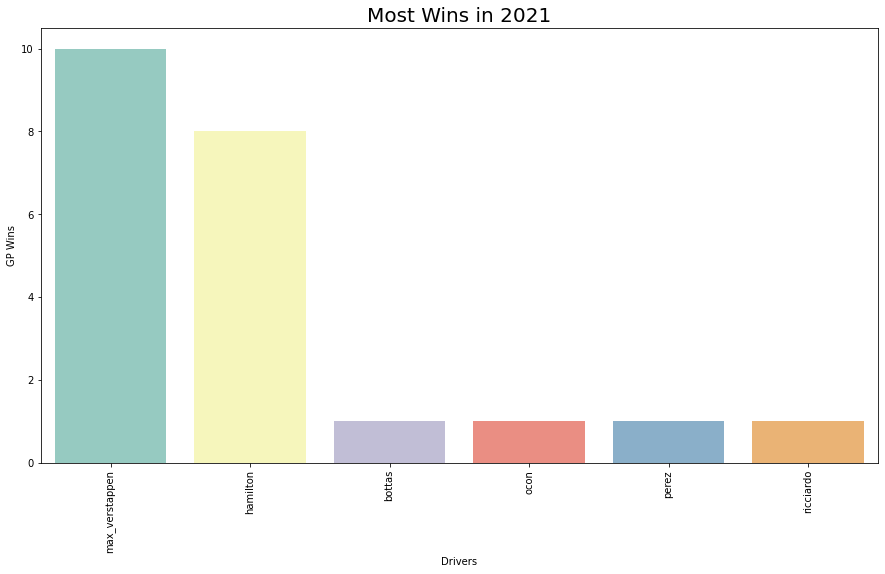

In [19]:

df = df[df['year']==2021]
#all gp winners
gp_winners = df.loc[df['positionOrder'] == 1].groupby('driver')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
#barplot
plt.figure(figsize=(15,8))
sns.barplot(x = 'driver', y = 'positionOrder', data = gp_winners.head(10))
#sns.barplot(data = gp_winners, x = 'driver', y = 'positionOrder', color='blue', alpha = 0.8)
plt.title('Most Wins in 2021', fontsize = 20)
plt.xlabel('Drivers')
plt.ylabel('GP Wins') 
plt.xticks(rotation = 90)
plt.show()


We can see that Max Vertapen from Redbull Racing is the most race winner. And he is the **Drivers World Champion** of the year 2021 and is guessed to be the winner in 2021

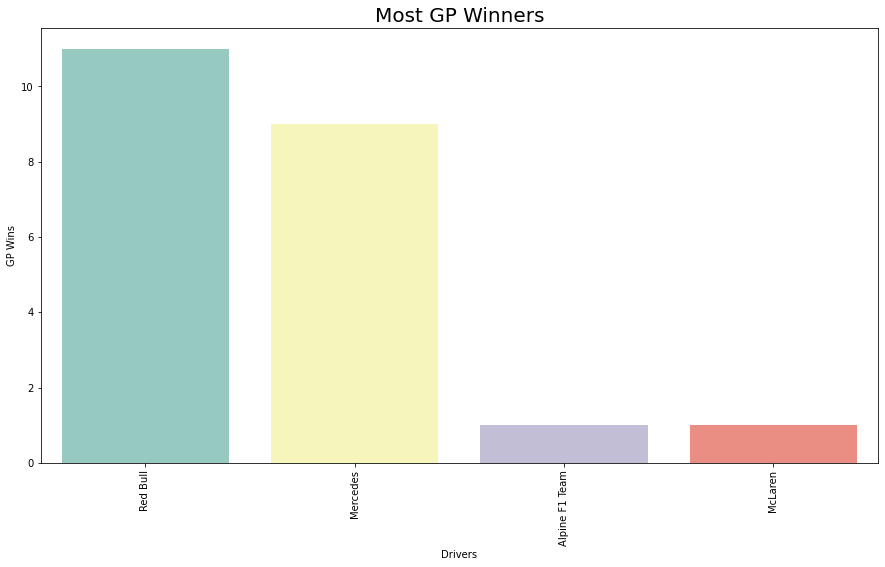

In [20]:
constructor_winners = df.loc[df['positionOrder'] == 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
#barplot
plt.figure(figsize=(15,8))
sns.barplot(x = 'constructor_name', y = 'positionOrder', data = constructor_winners.head(10))
#sns.barplot(data = gp_winners, x = 'driver', y = 'positionOrder', color='blue', alpha = 0.8)
plt.title('Most GP Winners', fontsize = 20)
plt.xlabel('Drivers')
plt.ylabel('GP Wins') 
plt.xticks(rotation = 90)
plt.show()

we can clearly see as max won more than lewis hamiton , redbull has won more races

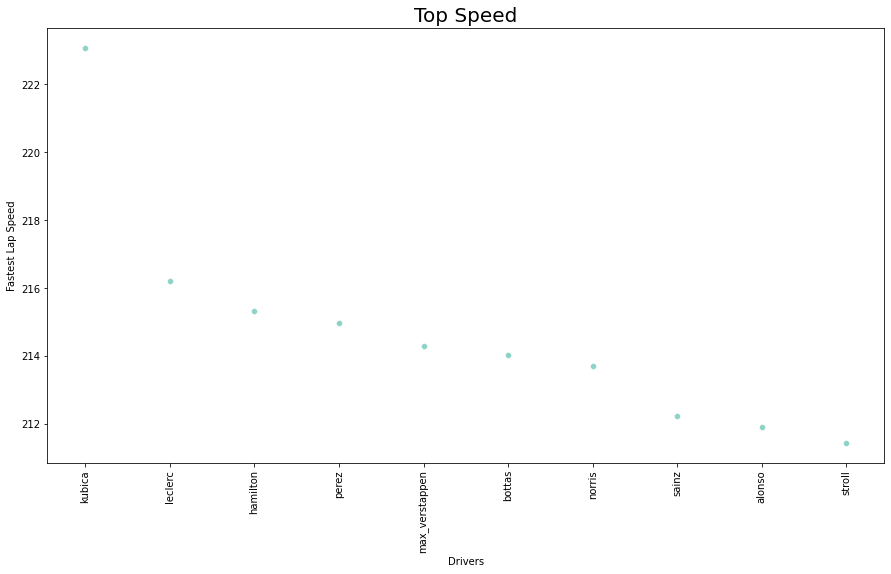

In [21]:
#Topspeed
fastestLap = df.groupby(['driver','constructor_name'])['fastestLapSpeed'].mean().sort_values(ascending = False).to_frame().reset_index()
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'driver', y = 'fastestLapSpeed', data = fastestLap.head(10))
plt.title('Top Speed', fontsize = 20) 
plt.xlabel('Drivers')
plt.ylabel('Fastest Lap Speed')
plt.xticks(rotation = 90)
plt.show()

Here comes the top speed, if the driver manages to cLock in a great speed it will be recorded in respect of any track

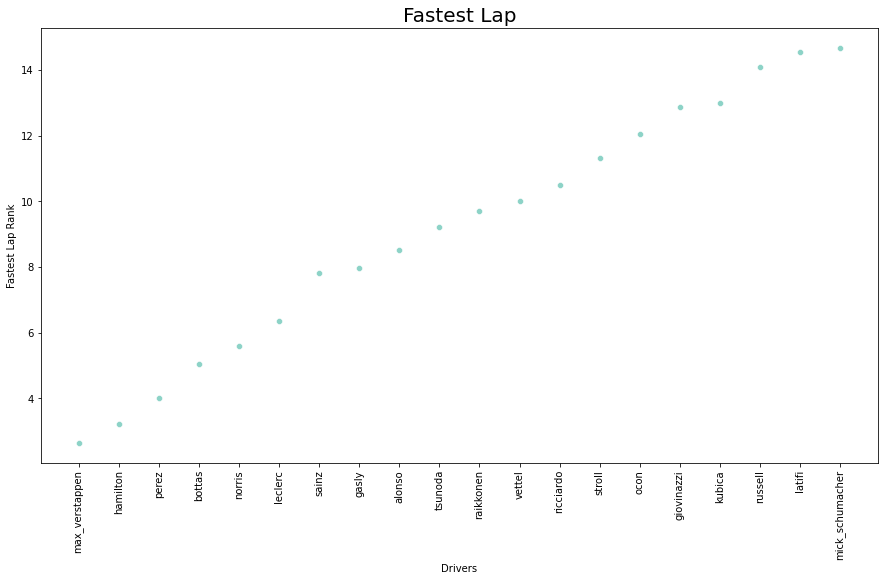

In [22]:
fastestLap = df.groupby(['driver','constructor_name'])['fastest_lap_rank'].mean().sort_values(ascending = True).to_frame().reset_index()
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'driver', y = 'fastest_lap_rank', data = fastestLap.head(20))
plt.title('Fastest Lap', fontsize = 20)
plt.xlabel('Drivers')
plt.ylabel('Fastest Lap Rank')
plt.xticks(rotation = 90)
plt.show()
    

Every race has a fastest Laptime, and we can see Max Verstappen winning more than twice. Fastest time is nothing but he fastest time which a aperson took complete one lap

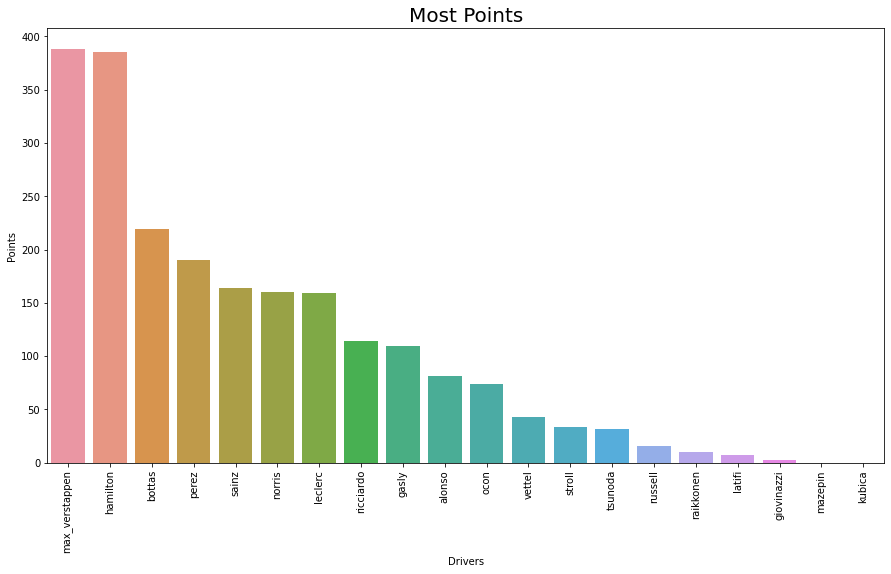

In [23]:
#drivers with most points
mostpoints = df.groupby(['driver','constructor_name'])['points'].sum().sort_values(ascending = False).to_frame().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = 'driver', y = 'points', data = mostpoints.head(20))
plt.title('Most Points', fontsize = 20)
plt.xlabel('Drivers')
plt.ylabel('Points')
plt.xticks(rotation = 90)
plt.show()
    

This is the final scoreboard or point table of 2021 drivers championship. We can see that there is nots big gap between lewis hamilton and max verstappen as they awer head on head in the season and other maintian a decent amount of gap to top2.

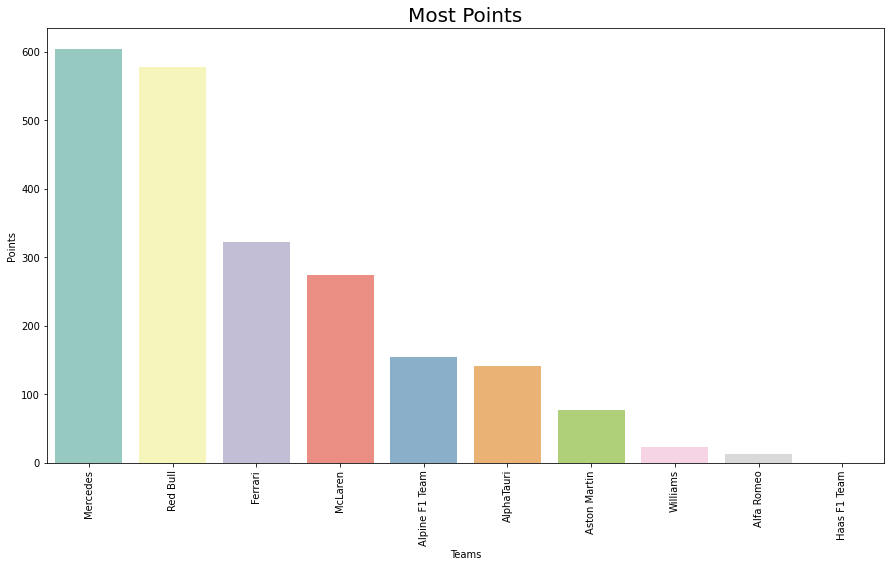

In [24]:
mostpoints_teams = df.groupby(['constructor_name'])['points'].sum().sort_values(ascending = False).to_frame().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = 'constructor_name', y = 'points', data = mostpoints_teams.head(20))
plt.title('Most Points', fontsize = 20)
plt.xlabel('Teams')
plt.ylabel('Points')
plt.xticks(rotation = 90)
plt.show()


We can see the scoreboard of 2021 Constructor Championship.
Mercedes are the constrcutor championship winner and have been consistently winning this from past 8 years.

## END OF ANALYSIS <B>
## THANK YOU ##